<a href="https://colab.research.google.com/github/KiraFitzge/IWS2023/blob/main/Independent_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Processing
import pandas as pd
import numpy as np
from numpy import mean

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Graphing
import matplotlib.pyplot as plt

# for data balancing
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [ ]:
# Data Cleaning
best = pd.read_csv('BEST.csv')
best = best.drop(['PARTICIPANT.NUMBER', 'GENDER', 'HANDEDNESS'], axis = 1)

best['MAXIMUM.EDUCATIONAL.LEVEL'] = best['MAXIMUM.EDUCATIONAL.LEVEL'].map({'High School':0,'University':1,'Postgraduate':2, 'Professional Training':3})

best.head(10)

# print(best['MAXIMUM.EDUCATIONAL.LEVEL'].unique())
# Create future datasets - untangle english and other languages, as well as look at
# the best number of features to look at

,AGE.IN.YEARS,MAXIMUM.EDUCATIONAL.LEVEL,PERCENTAGE.EXPOSED.SPANISH,PERCENTAGE.EXPOSED.BASQUE,PERCENTAGE.EXPOSED.ENGLISH,SELF.PERCEIVED.LEVEL.SPANISH,SELF.PERCEIVED.LEVEL.BASQUE,SELF.PERCEIVED.LEVEL.ENGLISH,INTERVIEW.MARK.SPANISH,INTERVIEW.MARK.BASQUE,INTERVIEW.MARK.ENGLISH,AGE.OF.ACQUISITION.SPANISH,AGE.OF.ACQUISITION.BASQUE,AGE.OF.ACQUISITION.ENGLISH,PICTURE.NAMING.TEST.SPANISH,PICTURE.NAMING.TEST.BASQUE,PICTURE.NAMING.TEST.ENGLISH,LEXTALE.TEST.SPANISH,LEXTALE.TEST.BASQUE,LEXTALE.TEST.ENGLISH
0,22,0,40,40,20,10,9,5,5,5,3,0,3,5,63,52,33,88.33,89,58.75
1,21,1,70,20,10,10,9,7,5,5,4,0,0,5,65,57,59,85.00,92,72.50
2,30,2,20,70,10,9,10,5,5,5,4,6,0,8,65,65,50,93.33,96,78.75
3,21,1,90,10,0,9,7,3,5,2,2,0,3,3,65,45,39,92.50,88,67.50
4,39,3,50,40,10,9,8,7,5,5,3,0,0,12,65,64,54,84.17,73,60.00
5,20,1,100,0,0,8,7,2,5,4,3,0,6,6,65,57,31,90.83,83,61.25
6,23,1,60,30,10,10,10,7,5,5,3,4,0,6,64,64,57,98.33,89,66.25
7,24,1,50,30,10,9,9,7,5,5,4,0,0,8,65,63,56,98.33,98,76.25
8,36,2,30,60,10,9,9,7,5,5,4,5,0,11,65,65,60,98.33,96,75.00
9,25,1,30,60,10,8,10,7,5,5,3,6,0,6,62,65,50,94.17,97,71.25


In [ ]:
#create initial binary mapping of early vs. late stage
def earlyClassifier1(n):
  if n <= 1:
    return 0
  return 1

def earlyClassifier2(n):
  if n <= 2:
    return 0
  return 1

def earlyClassifier3(n):
  if n <= 3:
    return 0
  return 1

def earlyClassifier4(n):
  if n <= 4:
    return 0
  return 1

def earlyClassifier5(n):
  if n <= 5:
    return 0
  return 1

def earlyClassifier6(n):
  if n <= 6:
    return 0
  return 1

def earlyClassifier7(n):
  if n <= 7:
    return 0
  return 1

def earlyClassifier8(n):
  if n <= 8:
    return 0
  return 1

def earlyClassifier9(n):
  if n <= 9:
    return 0
  return 1

def earlyClassifier10(n):
  if n <= 10:
    return 0
  return 1

binaryAcquisition1 = list(map(earlyClassifier1, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition2 = list(map(earlyClassifier2, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition3 = list(map(earlyClassifier3, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition4 = list(map(earlyClassifier4, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition5 = list(map(earlyClassifier5, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition6 = list(map(earlyClassifier6, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition7 = list(map(earlyClassifier7, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition8 = list(map(earlyClassifier8, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition9 = list(map(earlyClassifier9, list(best['AGE.OF.ACQUISITION.ENGLISH'])))
binaryAcquisition10 = list(map(earlyClassifier10, list(best['AGE.OF.ACQUISITION.ENGLISH'])))


#best['AGE.OF.ACQUISITION.BASQUE'] = list(map(earlyClassifier, list(best['AGE.OF.ACQUISITION.BASQUE'])))
#best['AGE.OF.ACQUISITION.SPANISH'] = list(map(earlyClassifier, list(best['AGE.OF.ACQUISITION.SPANISH'])))

#binaryAcquisition = best['AGE.OF.ACQUISITION.ENGLISH']
#binaryAcquisitionBasque = best['AGE.OF.ACQUISITION.BASQUE']
#binaryAcquisitionSpanish = best['AGE.OF.ACQUISITION.SPANISH']

#allVariables = best.drop(['AGE.OF.ACQUISITION.ENGLISH'], axis = 1)

# Create an English only dataframe 
EnglishOnly = pd.DataFrame()
EnglishOnly['AGE'] = best['AGE.IN.YEARS']
EnglishOnly['EDUCATION'] = best['MAXIMUM.EDUCATIONAL.LEVEL']
EnglishOnly['EXPOSURE'] = best['PERCENTAGE.EXPOSED.ENGLISH']
EnglishOnly['SELF.PERCEIVED'] = best['SELF.PERCEIVED.LEVEL.ENGLISH']
EnglishOnly['INTERVIEW'] = best['INTERVIEW.MARK.ENGLISH']
EnglishOnly['PICTURE.NAMING'] = best['PICTURE.NAMING.TEST.ENGLISH']
EnglishOnly['LEXTALE.TEST'] = best['LEXTALE.TEST.ENGLISH']

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over1, y_over1 = oversample.fit_resample(EnglishOnly, binaryAcquisition1)
X_over2, y_over2 = oversample.fit_resample(EnglishOnly, binaryAcquisition2)
X_over3, y_over3 = oversample.fit_resample(EnglishOnly, binaryAcquisition3)
X_over4, y_over4 = oversample.fit_resample(EnglishOnly, binaryAcquisition4)
X_over5, y_over5 = oversample.fit_resample(EnglishOnly, binaryAcquisition5)
X_over6, y_over6 = oversample.fit_resample(EnglishOnly, binaryAcquisition6)
X_over7, y_over7 = oversample.fit_resample(EnglishOnly, binaryAcquisition7)
X_over8, y_over8 = oversample.fit_resample(EnglishOnly, binaryAcquisition8)
X_over9, y_over9 = oversample.fit_resample(EnglishOnly, binaryAcquisition9)
X_over10, y_over10 = oversample.fit_resample(EnglishOnly, binaryAcquisition10)

#print(Counter(y_over))

#print(sum(binaryAcquisition6))
#print(sum(y_over))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over1, y_over1, test_size=0.2, random_state = 1, stratify = y_over1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_over2, y_over2, test_size=0.2, random_state = 1, stratify = y_over2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_over3, y_over3, test_size=0.2, random_state = 1, stratify = y_over3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_over4, y_over4, test_size=0.2, random_state = 1, stratify = y_over4)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_over5, y_over5, test_size=0.2, random_state = 1, stratify = y_over5)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_over6, y_over6, test_size=0.2, random_state = 1, stratify = y_over6)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_over7, y_over7, test_size=0.2, random_state = 1, stratify = y_over7)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_over8, y_over8, test_size=0.2, random_state = 1, stratify = y_over8)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_over9, y_over9, test_size=0.2, random_state = 1, stratify = y_over9)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_over10, y_over10, test_size=0.2, random_state = 1, stratify = y_over10)

#allVariables.head()


In [ ]:
param_grid =  {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_grid, 
                                 n_iter=10, 
                                 cv=5)

# Fit the random search object to the data
rf.fit(X_train1, y_train1)
y_pred1n = rf.predict(X_test1)
y_pred1nK = cross_val_predict(rf, X_test1, y_test1, cv=cv)

rand_search.fit(X_train1, y_train1)
best_rf = rand_search.best_estimator_
y_pred1noK = best_rf.predict(X_test1)
y_pred1 = cross_val_predict(best_rf, X_test1, y_test1, cv=cv)


rf.fit(X_train2, y_train2)
y_pred2n = rf.predict(X_test2)
y_pred2nK = cross_val_predict(rf, X_test2, y_test2, cv=cv)

rand_search.fit(X_train2, y_train2)
best_rf = rand_search.best_estimator_
y_pred2noK = best_rf.predict(X_test2)
y_pred2 = cross_val_predict(best_rf, X_test2, y_test2, cv=cv)


rf.fit(X_train3, y_train3)
y_pred3n = rf.predict(X_test3)
y_pred3nK = cross_val_predict(rf, X_test3, y_test3, cv=cv)

rand_search.fit(X_train3, y_train3)
best_rf = rand_search.best_estimator_
y_pred3noK = best_rf.predict(X_test3)
y_pred3 = cross_val_predict(best_rf, X_test3, y_test3, cv=cv)

rf.fit(X_train4, y_train4)
y_pred4n = rf.predict(X_test4)
y_pred4nK = cross_val_predict(rf, X_test4, y_test4, cv=cv)

rand_search.fit(X_train4, y_train4)
best_rf = rand_search.best_estimator_
y_pred4noK = best_rf.predict(X_test4)
y_pred4 = cross_val_predict(best_rf, X_test4, y_test4, cv=cv)


rf.fit(X_train5, y_train5)
y_pred5n = rf.predict(X_test5)
y_pred5nK = cross_val_predict(rf, X_test5, y_test5, cv=cv)

rand_search.fit(X_train5, y_train5)
best_rf = rand_search.best_estimator_
y_pred5noK = best_rf.predict(X_test5)
y_pred5 = cross_val_predict(best_rf, X_test5, y_test5, cv=cv)

rf.fit(X_train6, y_train6)
y_pred6n = rf.predict(X_test6)
y_pred6nK = cross_val_predict(rf, X_test6, y_test6, cv=cv)

rand_search.fit(X_train6, y_train6)
best_rf = rand_search.best_estimator_
y_pred6noK = best_rf.predict(X_test6)
y_pred6 = cross_val_predict(best_rf, X_test6, y_test6, cv=cv)


rf.fit(X_train7, y_train7)
y_pred7n = rf.predict(X_test7)
y_pred7nK = cross_val_predict(rf, X_test7, y_test7, cv=cv)

rand_search.fit(X_train7, y_train7)
best_rf = rand_search.best_estimator_
y_pred7noK = best_rf.predict(X_test7)
y_pred7 = cross_val_predict(best_rf, X_test7, y_test7, cv=cv)


rf.fit(X_train8, y_train8)
y_pred8n = rf.predict(X_test8)
y_pred8nK = cross_val_predict(rf, X_test8, y_test8, cv=cv)

rand_search.fit(X_train8, y_train8)
best_rf = rand_search.best_estimator_
y_pred8noK = best_rf.predict(X_test8)
y_pred8 = cross_val_predict(best_rf, X_test8, y_test8, cv=cv)

rf.fit(X_train9, y_train9)
y_pred9n = rf.predict(X_test9)
y_pred9nK = cross_val_predict(rf, X_test9, y_test9, cv=cv)

rand_search.fit(X_train9, y_train9)
best_rf = rand_search.best_estimator_
y_pred9noK = best_rf.predict(X_test9)
y_pred9 = cross_val_predict(best_rf, X_test9, y_test9, cv=cv)


rf.fit(X_train10, y_train10)
y_pred10n = rf.predict(X_test10)
y_pred10nK = cross_val_predict(rf, X_test10, y_test10, cv=cv)

rand_search.fit(X_train10, y_train10)
best_rf = rand_search.best_estimator_
y_pred10noK = best_rf.predict(X_test10)
y_pred10 = cross_val_predict(best_rf, X_test10, y_test10, cv=cv)

# Print the best hyperparameters
# #print('Best hyperparameters:',  rand_search.best_params_)

Accuracy: 0.980544747081712
Precision: 1.0
Recall: 0.9612403100775194
----------
Accuracy: 0.96875
Precision: 1.0
Recall: 0.9375
----------
Accuracy: 0.7434782608695653
Precision: 0.8043478260869565
Recall: 0.6434782608695652
----------
Accuracy: 0.7285714285714285
Precision: 0.7790697674418605
Recall: 0.638095238095238
----------
Accuracy: 0.6890243902439024
Precision: 0.7183098591549296
Recall: 0.6219512195121951
----------
Accuracy: 0.7317073170731707
Precision: 0.7317073170731707
Recall: 0.7317073170731707
----------
Accuracy: 0.7754010695187166
Precision: 0.782608695652174
Recall: 0.7659574468085106
----------
Accuracy: 0.8075117370892019
Precision: 0.8173076923076923
Recall: 0.794392523364486
----------
Accuracy: 0.827433628318584
Precision: 0.8245614035087719
Recall: 0.831858407079646
----------
Accuracy: 0.9291666666666667
Precision: 0.912
Recall: 0.95
----------


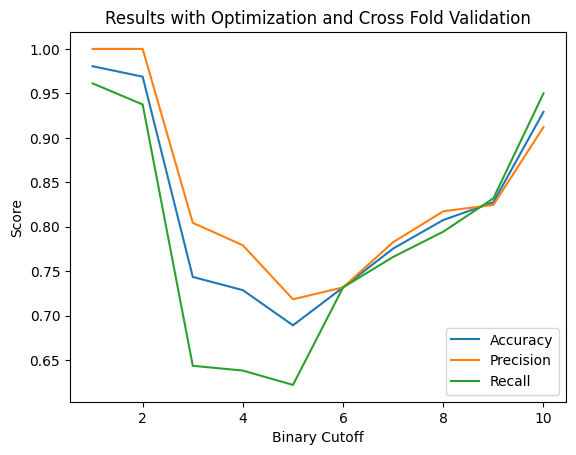

In [ ]:
# Evaluating Performance of the Models

# With hyperparameter tuning and kfold validation - REDUNDANT
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)

accuracy3 = accuracy_score(y_test3, y_pred3)
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)

accuracy4 = accuracy_score(y_test4, y_pred4)
precision4 = precision_score(y_test4, y_pred4)
recall4 = recall_score(y_test4, y_pred4)

accuracy5 = accuracy_score(y_test5, y_pred5)
precision5 = precision_score(y_test5, y_pred5)
recall5 = recall_score(y_test5, y_pred5)

accuracy6 = accuracy_score(y_test6, y_pred6)
precision6 = precision_score(y_test6, y_pred6)
recall6 = recall_score(y_test6, y_pred6)

accuracy7 = accuracy_score(y_test7, y_pred7)
precision7 = precision_score(y_test7, y_pred7)
recall7 = recall_score(y_test7, y_pred7)

accuracy8 = accuracy_score(y_test8, y_pred8)
precision8 = precision_score(y_test8, y_pred8)
recall8 = recall_score(y_test8, y_pred8)

accuracy9 = accuracy_score(y_test9, y_pred9)
precision9 = precision_score(y_test9, y_pred9)
recall9 = recall_score(y_test9, y_pred9)

accuracy10 = accuracy_score(y_test10, y_pred10)
precision10 = precision_score(y_test10, y_pred10)
recall10 = recall_score(y_test10, y_pred10)

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
precisions = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]
recalls = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

for i in range(10):
  print("Accuracy:", accuracies[i])
  print("Precision:", precisions[i])
  print("Recall:", recalls[i])
  print("----------")

plt.plot(x_values, accuracies, label = "Accuracy")
plt.plot(x_values, precisions, label = "Precision")
plt.plot(x_values, recalls, label = "Recall")
plt.legend()
plt.xlabel("Binary Cutoff")
plt.ylabel("Score")
plt.title("Results with Optimization and Cross Fold Validation")
plt.show()



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
----------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
----------
Accuracy: 0.9608695652173913
Precision: 1.0
Recall: 0.9217391304347826
----------
Accuracy: 0.9095238095238095
Precision: 1.0
Recall: 0.819047619047619
----------
Accuracy: 0.8048780487804879
Precision: 0.8472222222222222
Recall: 0.7439024390243902
----------
Accuracy: 0.8109756097560976
Precision: 0.7865168539325843
Recall: 0.8536585365853658
----------
Accuracy: 0.8770053475935828
Precision: 0.8380952380952381
Recall: 0.9361702127659575
----------
Accuracy: 0.9577464788732394
Precision: 0.9224137931034483
Recall: 1.0
----------
Accuracy: 0.9601769911504425
Precision: 0.9262295081967213
Recall: 1.0
----------
Accuracy: 0.9791666666666666
Precision: 0.96
Recall: 1.0
----------


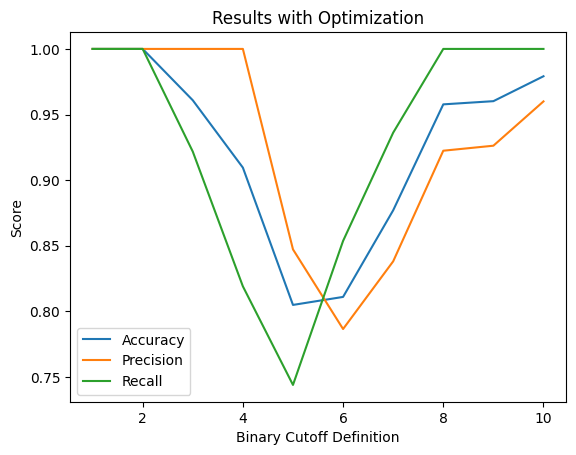

In [ ]:
# Displaying the results of Random Forest Classifier
# With hyperparameter tuning only

accuracy1 = accuracy_score(y_test1, y_pred1noK)
precision1 = precision_score(y_test1, y_pred1noK)
recall1 = recall_score(y_test1, y_pred1noK)

accuracy2 = accuracy_score(y_test2, y_pred2noK)
precision2 = precision_score(y_test2, y_pred2noK)
recall2 = recall_score(y_test2, y_pred2noK)

accuracy3 = accuracy_score(y_test3, y_pred3noK)
precision3 = precision_score(y_test3, y_pred3noK)
recall3 = recall_score(y_test3, y_pred3noK)

accuracy4 = accuracy_score(y_test4, y_pred4noK)
precision4 = precision_score(y_test4, y_pred4noK)
recall4 = recall_score(y_test4, y_pred4noK)

accuracy5 = accuracy_score(y_test5, y_pred5noK)
precision5 = precision_score(y_test5, y_pred5noK)
recall5 = recall_score(y_test5, y_pred5noK)

accuracy6 = accuracy_score(y_test6, y_pred6noK)
precision6 = precision_score(y_test6, y_pred6noK)
recall6 = recall_score(y_test6, y_pred6noK)

accuracy7 = accuracy_score(y_test7, y_pred7noK)
precision7 = precision_score(y_test7, y_pred7noK)
recall7 = recall_score(y_test7, y_pred7noK)

accuracy8 = accuracy_score(y_test8, y_pred8noK)
precision8 = precision_score(y_test8, y_pred8noK)
recall8 = recall_score(y_test8, y_pred8noK)

accuracy9 = accuracy_score(y_test9, y_pred9noK)
precision9 = precision_score(y_test9, y_pred9noK)
recall9 = recall_score(y_test9, y_pred9noK)

accuracy10 = accuracy_score(y_test10, y_pred10noK)
precision10 = precision_score(y_test10, y_pred10noK)
recall10 = recall_score(y_test10, y_pred10noK)

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
precisions = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]
recalls = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

for i in range(10):
  print("Accuracy:", accuracies[i])
  print("Precision:", precisions[i])
  print("Recall:", recalls[i])
  print("----------")

plt.plot(x_values, accuracies, label = "Accuracy")
plt.plot(x_values, precisions, label = "Precision")
plt.plot(x_values, recalls, label = "Recall")
plt.legend()
plt.xlabel("Binary Cutoff Definition")
plt.ylabel("Score")
plt.title("Results with Optimization")
plt.show()



Accuracy: 0.9883268482490273
Precision: 1.0
Recall: 0.9767441860465116
----------
Accuracy: 0.97265625
Precision: 1.0
Recall: 0.9453125
----------
Accuracy: 0.782608695652174
Precision: 0.8421052631578947
Recall: 0.6956521739130435
----------
Accuracy: 0.6714285714285714
Precision: 0.7045454545454546
Recall: 0.5904761904761905
----------
Accuracy: 0.676829268292683
Precision: 0.704225352112676
Recall: 0.6097560975609756
----------
Accuracy: 0.6524390243902439
Precision: 0.6582278481012658
Recall: 0.6341463414634146
----------
Accuracy: 0.7807486631016043
Precision: 0.7789473684210526
Recall: 0.7872340425531915
----------
Accuracy: 0.8169014084507042
Precision: 0.8090909090909091
Recall: 0.8317757009345794
----------
Accuracy: 0.8451327433628318
Precision: 0.8305084745762712
Recall: 0.8672566371681416
----------
Accuracy: 0.9458333333333333
Precision: 0.9212598425196851
Recall: 0.975
----------


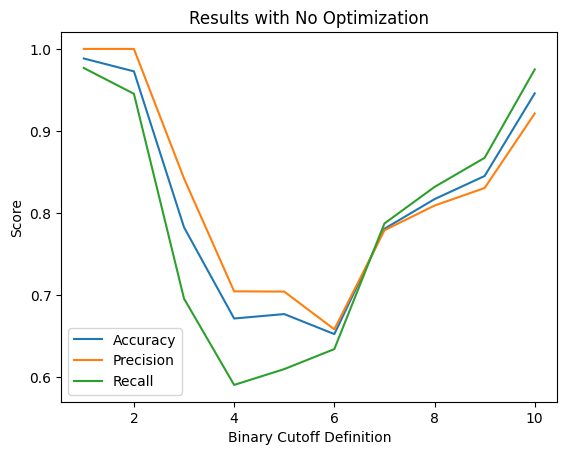

In [ ]:
# Evaluating the performance of the models, no optimization and kfold cross validation

accuracy1 = accuracy_score(y_test1, y_pred1nK)
precision1 = precision_score(y_test1, y_pred1nK)
recall1 = recall_score(y_test1, y_pred1nK)

accuracy2 = accuracy_score(y_test2, y_pred2nK)
precision2 = precision_score(y_test2, y_pred2nK)
recall2 = recall_score(y_test2, y_pred2nK)

accuracy3 = accuracy_score(y_test3, y_pred3nK)
precision3 = precision_score(y_test3, y_pred3nK)
recall3 = recall_score(y_test3, y_pred3nK)

accuracy4 = accuracy_score(y_test4, y_pred4nK)
precision4 = precision_score(y_test4, y_pred4nK)
recall4 = recall_score(y_test4, y_pred4nK)

accuracy5 = accuracy_score(y_test5, y_pred5nK)
precision5 = precision_score(y_test5, y_pred5nK)
recall5 = recall_score(y_test5, y_pred5nK)

accuracy6 = accuracy_score(y_test6, y_pred6nK)
precision6 = precision_score(y_test6, y_pred6nK)
recall6 = recall_score(y_test6, y_pred6nK)

accuracy7 = accuracy_score(y_test7, y_pred7nK)
precision7 = precision_score(y_test7, y_pred7nK)
recall7 = recall_score(y_test7, y_pred7nK)

accuracy8 = accuracy_score(y_test8, y_pred8nK)
precision8 = precision_score(y_test8, y_pred8nK)
recall8 = recall_score(y_test8, y_pred8nK)

accuracy9 = accuracy_score(y_test9, y_pred9nK)
precision9 = precision_score(y_test9, y_pred9nK)
recall9 = recall_score(y_test9, y_pred9nK)

accuracy10 = accuracy_score(y_test10, y_pred10nK)
precision10 = precision_score(y_test10, y_pred10nK)
recall10 = recall_score(y_test10, y_pred10nK)

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
precisions = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]
recalls = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

for i in range(10):
  print("Accuracy:", accuracies[i])
  print("Precision:", precisions[i])
  print("Recall:", recalls[i])
  print("----------")

plt.plot(x_values, accuracies, label = "Accuracy")
plt.plot(x_values, precisions, label = "Precision")
plt.plot(x_values, recalls, label = "Recall")
plt.legend()
plt.xlabel("Binary Cutoff Definition")
plt.ylabel("Score")
plt.title("Results with No Optimization")
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
----------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
----------
Accuracy: 0.9652173913043478
Precision: 1.0
Recall: 0.9304347826086956
----------
Accuracy: 0.9142857142857143
Precision: 0.967741935483871
Recall: 0.8571428571428571
----------
Accuracy: 0.8048780487804879
Precision: 0.8289473684210527
Recall: 0.7682926829268293
----------
Accuracy: 0.8048780487804879
Precision: 0.7717391304347826
Recall: 0.8658536585365854
----------
Accuracy: 0.8877005347593583
Precision: 0.8543689320388349
Recall: 0.9361702127659575
----------
Accuracy: 0.9436619718309859
Precision: 0.8991596638655462
Recall: 1.0
----------
Accuracy: 0.9601769911504425
Precision: 0.9262295081967213
Recall: 1.0
----------
Accuracy: 0.9791666666666666
Precision: 0.96
Recall: 1.0
----------


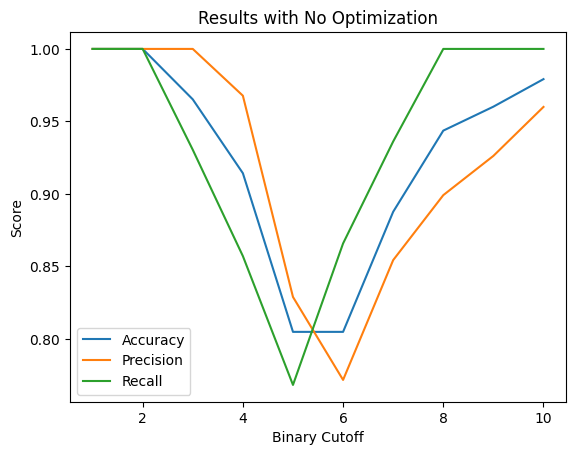

In [ ]:
# Evaluating the performance of the model, with no optimization - REDUNDANT

accuracy1 = accuracy_score(y_test1, y_pred1n)
precision1 = precision_score(y_test1, y_pred1n)
recall1 = recall_score(y_test1, y_pred1n)

accuracy2 = accuracy_score(y_test2, y_pred2n)
precision2 = precision_score(y_test2, y_pred2n)
recall2 = recall_score(y_test2, y_pred2n)

accuracy3 = accuracy_score(y_test3, y_pred3n)
precision3 = precision_score(y_test3, y_pred3n)
recall3 = recall_score(y_test3, y_pred3n)

accuracy4 = accuracy_score(y_test4, y_pred4n)
precision4 = precision_score(y_test4, y_pred4n)
recall4 = recall_score(y_test4, y_pred4n)

accuracy5 = accuracy_score(y_test5, y_pred5n)
precision5 = precision_score(y_test5, y_pred5n)
recall5 = recall_score(y_test5, y_pred5n)

accuracy6 = accuracy_score(y_test6, y_pred6n)
precision6 = precision_score(y_test6, y_pred6n)
recall6 = recall_score(y_test6, y_pred6n)

accuracy7 = accuracy_score(y_test7, y_pred7n)
precision7 = precision_score(y_test7, y_pred7n)
recall7 = recall_score(y_test7, y_pred7n)

accuracy8 = accuracy_score(y_test8, y_pred8n)
precision8 = precision_score(y_test8, y_pred8n)
recall8 = recall_score(y_test8, y_pred8n)

accuracy9 = accuracy_score(y_test9, y_pred9n)
precision9 = precision_score(y_test9, y_pred9n)
recall9 = recall_score(y_test9, y_pred9n)

accuracy10 = accuracy_score(y_test10, y_pred10n)
precision10 = precision_score(y_test10, y_pred10n)
recall10 = recall_score(y_test10, y_pred10n)

x_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8, accuracy9, accuracy10]
precisions = [precision1, precision2, precision3, precision4, precision5, precision6, precision7, precision8, precision9, precision10]
recalls = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8, recall9, recall10]

for i in range(10):
  print("Accuracy:", accuracies[i])
  print("Precision:", precisions[i])
  print("Recall:", recalls[i])
  print("----------")

plt.plot(x_values, accuracies, label = "Accuracy")
plt.plot(x_values, precisions, label = "Precision")
plt.plot(x_values, recalls, label = "Recall")
plt.legend()
plt.xlabel("Binary Cutoff")
plt.ylabel("Score")
plt.title("Results with No Optimization")
plt.show()

Accuracy: 0.6524390243902439


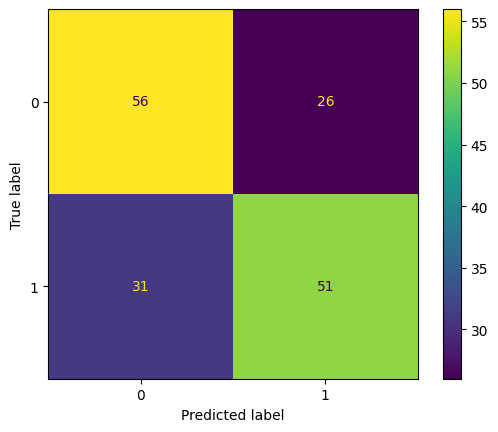

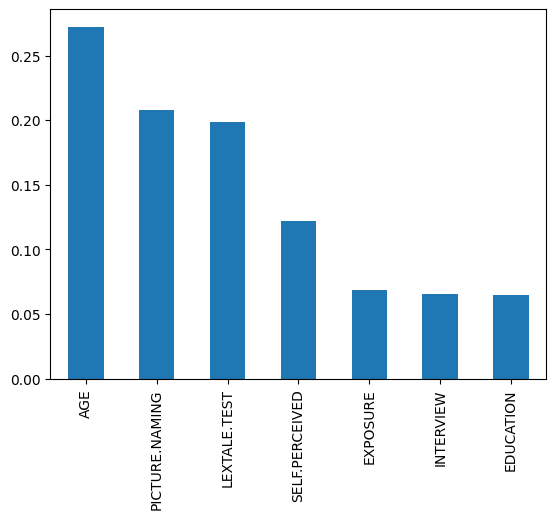

Confusion Matrix for Random Forest
Accuracy: 0.7987804878048781


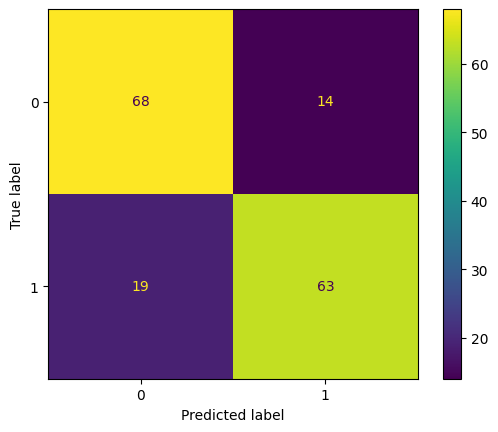

AGE               0.275763
PICTURE.NAMING    0.207567
LEXTALE.TEST      0.193676
SELF.PERCEIVED    0.120917
EXPOSURE          0.070924
INTERVIEW         0.066216
EDUCATION         0.064938
dtype: float64


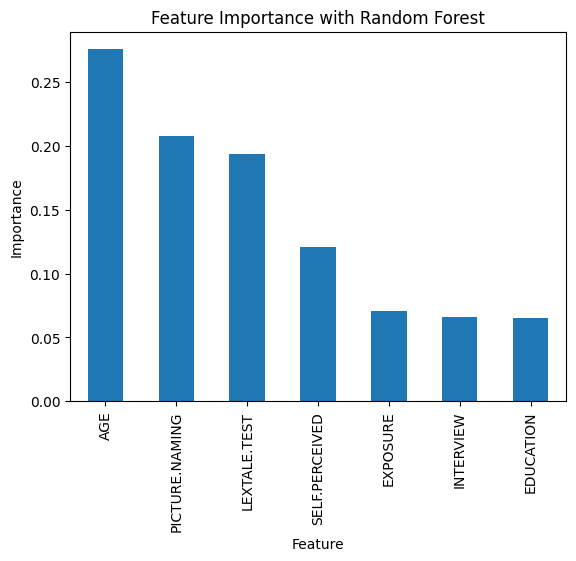

In [ ]:
# Visualizations for random forest classifier

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_over5, y_over5, test_size=0.2, random_state = 1, stratify = y_over5)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

rf = RandomForestClassifier()
rf.fit(X_train5, y_train5)
y_pred5 = cross_val_predict(rf, X_test5, y_test5, cv=cv)
accuracy = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test5, y_pred5)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


feature_importances = pd.Series(rf.feature_importances_, index=X_train5.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.show()

param_grid =  {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a based model
# Instantiate the grid search model
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_grid, 
                                 n_iter=15, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train5, y_train5)
best_rf = rand_search.best_estimator_
# Fit the random search object to the data
y_pred5 = best_rf.predict(X_test5)
accuracy = accuracy_score(y_test5, y_pred5)
print("Confusion Matrix for Random Forest")
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test5, y_pred5)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


feature_importances = pd.Series(best_rf.feature_importances_, index=X_train5.columns).sort_values(ascending=False)
print(feature_importances)
feature_importances.plot.bar()
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance with Random Forest")
plt.show()